In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [88]:
data = pd.read_csv("winequality-red.csv")

In [89]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [90]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [91]:
regressor = DecisionTreeRegressor(random_state=42, max_depth=6)

In [92]:
regressor.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [93]:
ypred = regressor.predict(xtest)

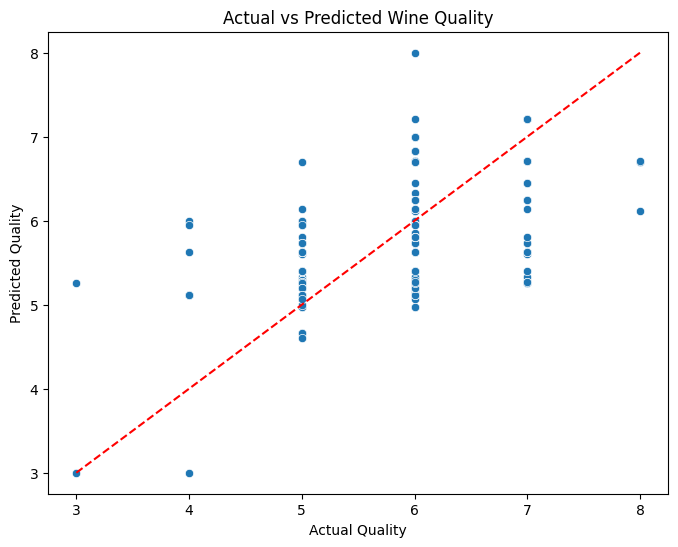

In [94]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ytest, y=ypred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect prediction line
plt.show()

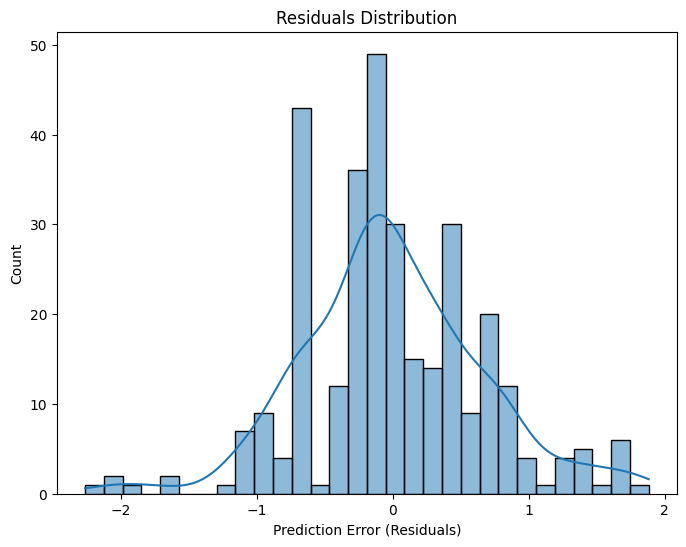

In [95]:
# Residuals
residuals = ytest - ypred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residuals)")
plt.show()


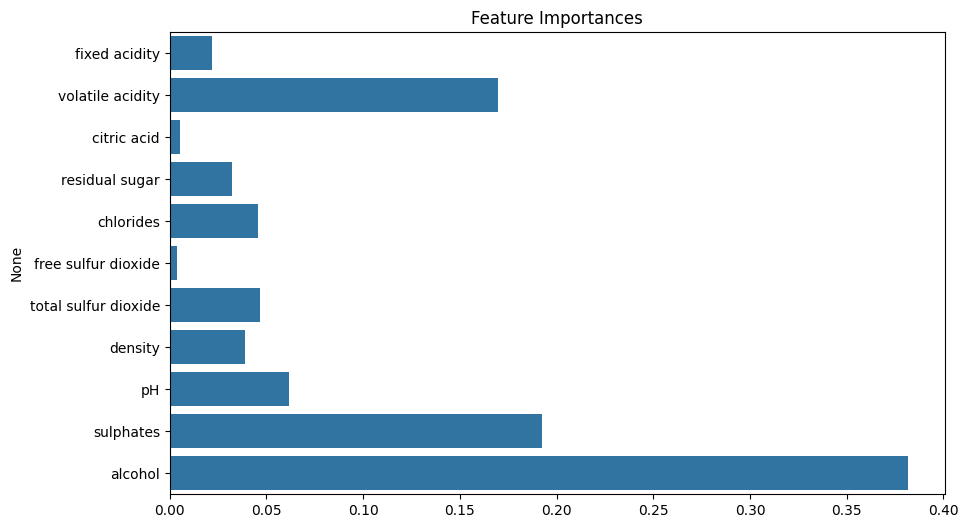

In [96]:
# Feature importance
importances = regressor.feature_importances_
features = x.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()


In [97]:
print("R² Score:", r2_score(ytest, ypred))
print("RMSE:", mean_squared_error(ytest, ypred))

R² Score: 0.25816766974747085
RMSE: 0.44277392766312823
